In [2]:
# 导包
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

In [3]:
#引入tsv文件
df = pd.read_csv(r'4月30日\gapminder.tsv',sep='\t',header=0)
df.head

<bound method NDFrame.head of           country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]>

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64


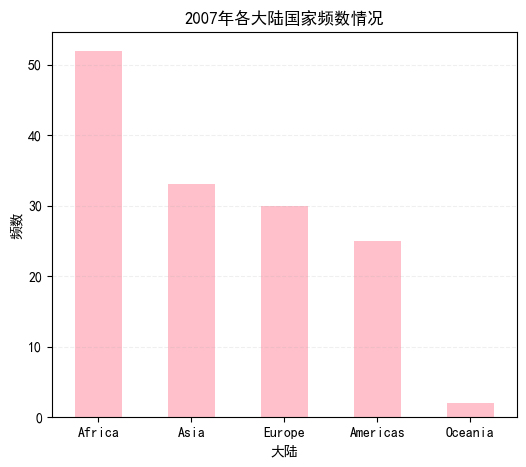

In [5]:
# Q1. 大陆国家频数情况
df_2007 = df[df["year"]==2007]
#print(df_2007)
continent_counts = df_2007["continent"].value_counts()
print(continent_counts)
plt.figure(figsize=(6, 5))
continent_counts.plot(kind='bar', color='pink')
plt.title('2007年各大陆国家频数情况')
plt.xlabel('大陆')
plt.ylabel('频数')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

<Axes: xlabel='continent', ylabel='count'>

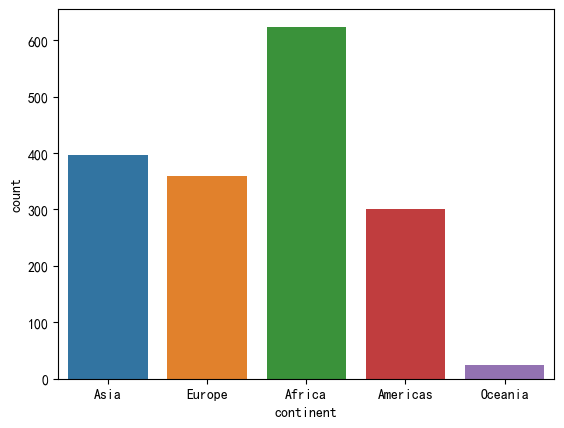

In [6]:
sns.countplot(x=df["continent"])

In [13]:
#2.
df_ct = df_2007('continent')['gdpPercap'].mean()
plt.bar(x=df_ct.index,height=df_ct.values)

TypeError: 'DataFrame' object is not callable

#3
df_china=df[df['country']=="China"]
df_china_life = df_china.groupby("year")["gdpPercap"].mean()
df_yr = df['year'].unique()
plt.plot(x=df_yr,y=df_china_life.values)

In [ ]:
#3
df_china=df[df['country']=="China"]
df_china_life = df_china.groupby("year")["gdpPercap"].mean()
df_yr = df['year'].unique()
plt.plot(x=df_yr,y=df_china_life.values)

<Axes: xlabel='year'>

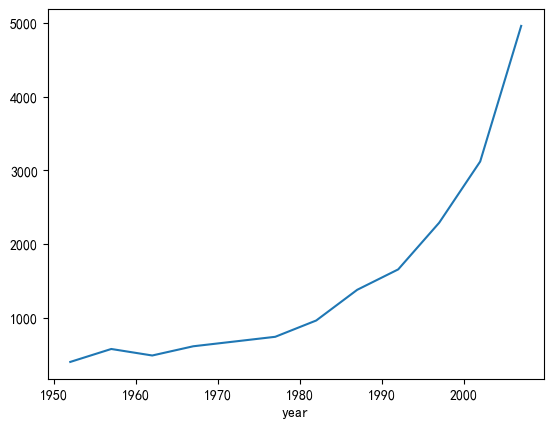

In [14]:
#3.
df_china=df[df['country']=="China"]
df_china_life = df_china.groupby("year")["gdpPercap"].mean()
df_yr = df['year'].unique()
sns.lineplot(x=df_china['year'],y=df_china_life.values)

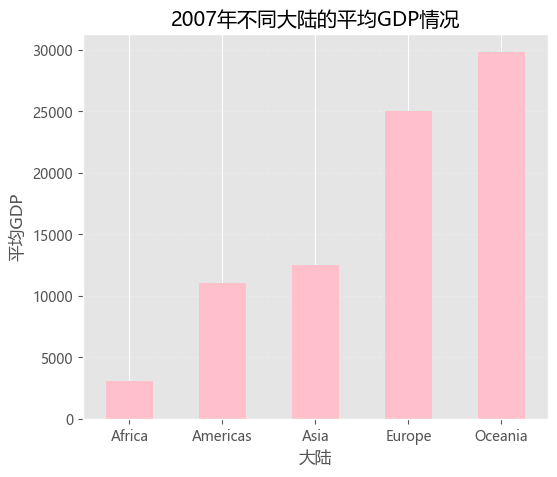

In [254]:
#Q2.请用合适图表表示2007年不同大陆的GDP（gdpPercap）平均情况。
avg_GDP=df.groupby(df_2007["continent"])["gdpPercap"].mean()
#h     #也可用 h.head()
#print(avg_GDP)
#avg_GDP.apply(lambda x:x)

plt.figure(figsize=(6, 5))
avg_GDP.plot(kind='bar',color='pink')
plt.xlabel('大陆')
plt.ylabel('平均GDP')
plt.title('2007年不同大陆的平均GDP情况')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

In [113]:
#Q2.作废   请用合适图表表示2007年不同大陆的GDP（gdpPercap）平均情况。
# groups = df_2007.groupby("continent")
# groupsGDP = (groups["continent","gdpPercap"]).mean()
# groupsGDP.apply(lambda x:x)

#设置绘图样式
# plt.style.use('ggplot')
# #解决中文乱码
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# #解决坐标轴为负号
# plt.rcParams['axes.unicode_minus']=False
# #avg_gdp = np.mean(df_2007.gdpPercap)
# #print(avg_gdp)
# plt.plot(
#         df_2007.continent,#x轴
#         avg_GDP,#y轴df_2007.gdpPercap
#         linestyle = '-', # 折线类型
#         linewidth = 2, # 折线宽度
#         color = 'red', # 折线颜色
#         marker = 'o', # 折线图中添加圆点
#         markersize = 3, # 点的大小
#         markeredgecolor='black', # 点的边框色
#         markerfacecolor='blue', # 点的填充色
#         )
# plt.title("2007年不同大陆的平均GDP") 


In [ ]:
sns.barplot(x=df_2007["gdpPercap"],hue="countinent" , data= df_2007)
#x=df_2007.grouby("continent")["gdpPercap"]

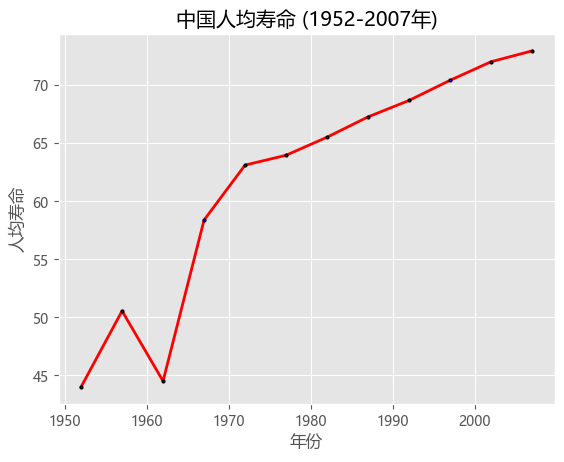

In [259]:
#Q3. 请用合适图表 表示中国从1952至2007年 与 人均寿命 情况。
df_china = df[df['country'] == 'China']
plt.plot(
        df_china['year'],
        df_china['lifeExp'],        
        linestyle = '-', # 折线类型
        linewidth = 2, # 折线宽度
        color = 'red', # 折线颜色
        marker = 'o', # 折线图中添加圆点
        markersize = 2, # 点的大小
        markeredgecolor='black', # 点的边框色
        markerfacecolor='blue', # 点的填充色
    )
plt.xlabel('年份')
plt.ylabel('人均寿命')
plt.title('中国人均寿命 (1952-2007年)')
plt.show()

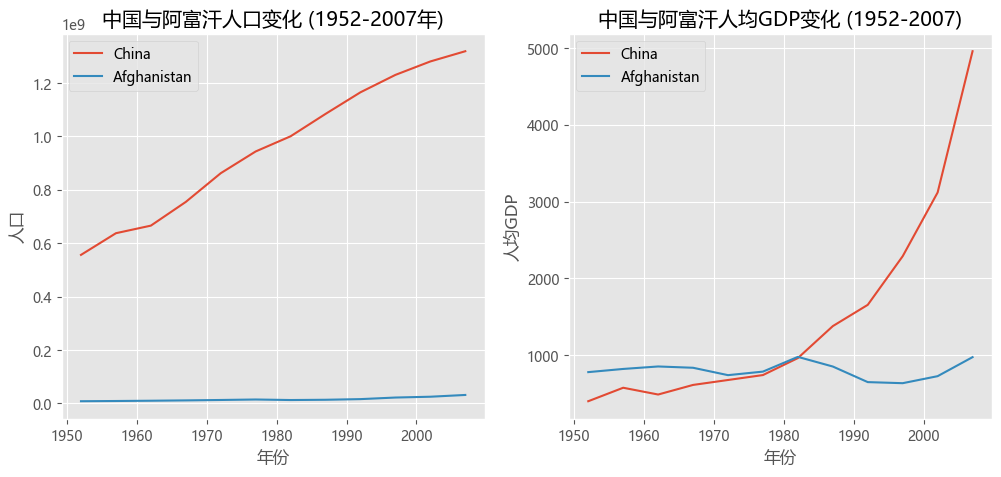

In [264]:
#Q4. 请用合适的图表表示中国的人口与人均GDP情况，阿富汗人口与人均GDP情况，两者有区别吗？（）
china_avg_gdp = df[df['country'] == 'China'][['year', 'pop', 'gdpPercap']]
afghanistan_avg_gdp = df[df['country'] == 'Afghanistan'][['year', 'pop', 'gdpPercap']]
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(china_avg_gdp['year'], china_avg_gdp['pop'], label='China')
plt.plot(afghanistan_avg_gdp['year'], afghanistan_avg_gdp['pop'], label='Afghanistan')
plt.xlabel('年份')
plt.ylabel('人口')
plt.title('中国与阿富汗人口变化 (1952-2007年)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(china_avg_gdp['year'], china_avg_gdp['gdpPercap'], label='China')
plt.plot(afghanistan_avg_gdp['year'], afghanistan_avg_gdp['gdpPercap'], label='Afghanistan')
plt.title('中国与阿富汗人均GDP变化 (1952-2007)')
plt.xlabel('年份')
plt.ylabel('人均GDP')
plt.legend()
plt.show()



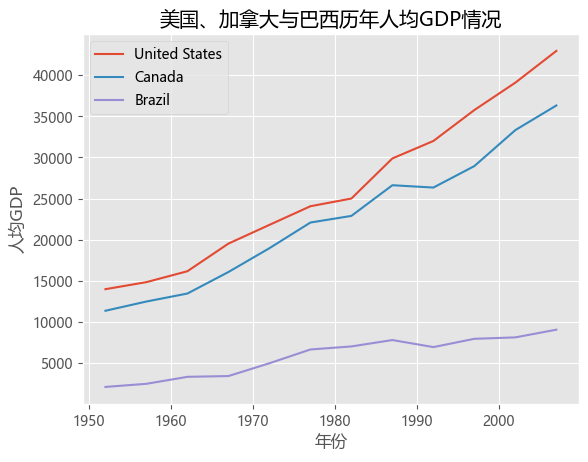

In [257]:
#Q5. 请用折线图对比比较美国('United States')， 加拿大('Canada')与巴西('Brazil')历年来的人均GDP情况，三条折线作在同一个图中。
df_US = df[df['country'] == 'United States']
df_canada = df[df['country'] == 'Canada']
df_brazil = df[df['country'] == 'Brazil']
plt.plot(df_US['year'], df_US['gdpPercap'], label='United States')
plt.plot(df_canada['year'], df_canada['gdpPercap'], label='Canada')
plt.plot(df_brazil['year'], df_brazil['gdpPercap'], label='Brazil')
plt.xlabel('年份')
plt.ylabel('人均GDP')
plt.title('美国、加拿大与巴西历年人均GDP情况')
plt.legend()
plt.show()

In [ ]:
#5.
df_US = df[df['country'] == 'United States']
df_canada = df[df['country'] == 'Canada']
df_brazil = df[df['country'] == 'Brazil']
df_u = df_US.groupby("year")['gdpPercap'].mean()
plt.plot(df_US['year'].unique(), df_US['gdpPercap'].values, label='United States')
plt.plot(df_canada['year'], df_canada['gdpPercap'], label='Canada')
plt.plot(df_brazil['year'], df_brazil['gdpPercap'], label='Brazil')

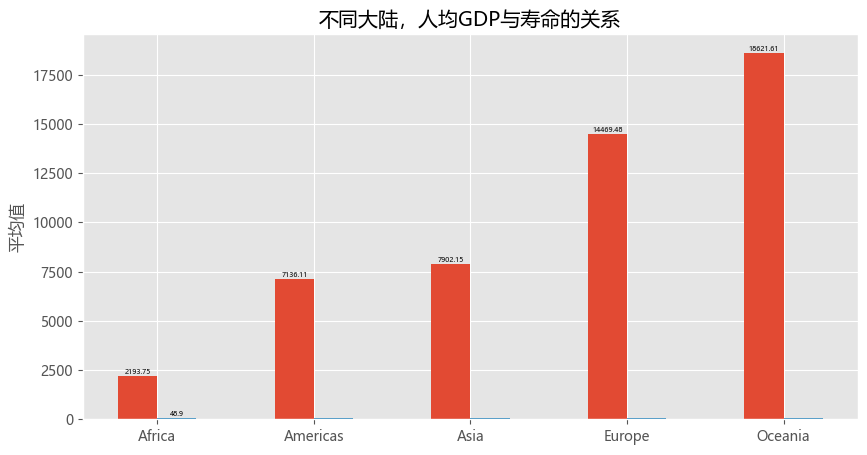

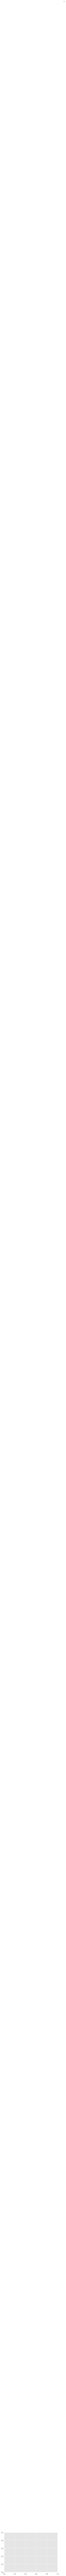

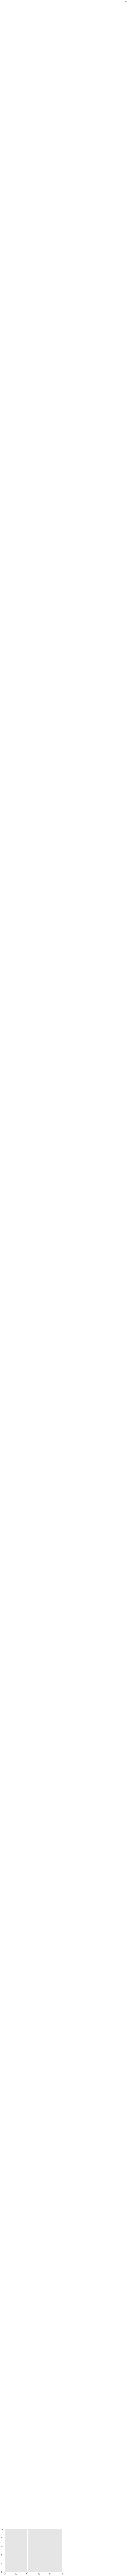

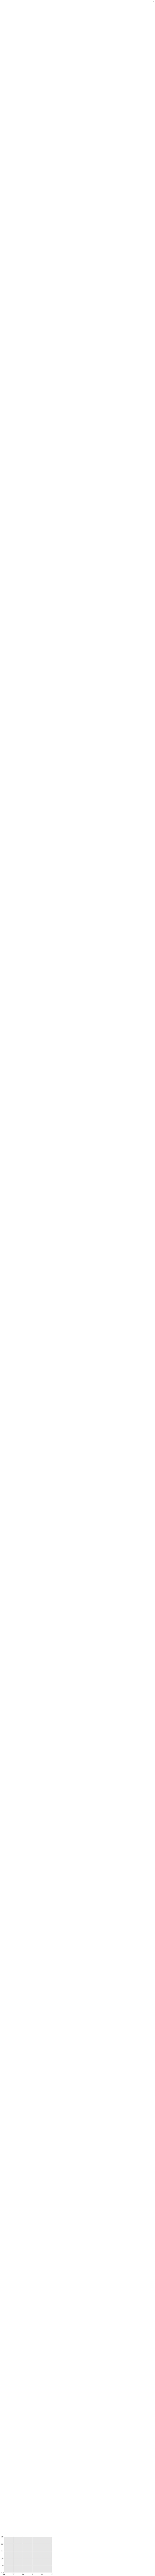

In [263]:
#Q6. 请用合适图表表示不同大陆，人均GDP与寿命的关系。
#continent_avg = df.groupby(df["continent"])[["continent","gdpPercap","lifeExp"]].mean(numeric_only=True)
def drawHistogram():
    matplotlib.rc("font", family='MicroSoft YaHei')
#    list1 = continent_avg["gdpPercap"]   # 柱状图第一组数据
#    list2 = continent_avg["lifeExp"]   # 柱状图第二组数据 
    avg_GDP=df.groupby(df["continent"])["gdpPercap"].mean()# 柱状图第一组数据
    avg_life=df.groupby(df["continent"])["lifeExp"].mean()# 柱状图第二组数据
    avgData = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
    length = len(avg_GDP)
    x = np.arange(length)   # 横坐标范围
    
    plt.figure(figsize=(10,5))
    #plt.figure()
    total_width, n = 0.5, 2   # 柱状图总宽度，有几组数据
    width = total_width / n   # 单个柱状图的宽度
    x1 = x - width / 2   # 第一组数据柱状图横坐标起始位置
    x2 = x1 + width   # 第二组数据柱状图横坐标起始位置

    plt.title("不同大陆，人均GDP与寿命的关系")   # 柱状图标题
    plt.ylabel("平均值")   # 纵坐标label
    plt.bar(x1, avg_GDP, width=width, label="人均GDP")
    plt.bar(x2, avg_life, width=width, label="人均寿命")
    #plt.xticks(rotation=0)
    plt.xticks(x,avgData)
    for a, b in zip(x1, avg_GDP):
        plt.text(a, b + 0.1, '%.2f' % b, ha='center', va='bottom', fontsize=5)
    for a, b in zip(x2, avg_life):
        plt.text(a, b + 0.1, '%.1f' % b, ha='center', va='bottom', fontsize=5)
        #plt.legend()   # 给出图例
        plt.show()

if __name__ == '__main__':
    drawHistogram()





In [ ]:
from